## Diffuion model
Diffusion in infinte area.  
  
Diffusion equations and boundary conditions.
\begin{eqnarray*}
\frac{\partial C_o(x,t)}{\partial t} = D_o\left[\frac{\partial^2 C_o(x,t}{\partial x^2} \right]  
\end{eqnarray*}

\begin{eqnarray*}
C_o(x, t=0) =C_o^*\\
C_o(x \rightarrow \infty , t) =C_o^*
\end{eqnarray*}

The current i(t) is presumed as below.
\begin{eqnarray*}
D_o\left[\frac{\partial C_o(x,t)}{\partial x}\right]_{x=0} = \frac{i(t)}{nFA}
\end{eqnarray*}




\begin{eqnarray*}
C_o(x,t) = C_o^* -\frac{i}{zFAD_o}\left\{2\left(\frac{D_o t}{\pi}\right)^{0.5}\exp{\left(-\frac{x^2}{4D_ot} -x erfc\left[\frac{x}{2(D_ot)^{0.5}} \right] \right)}\right\}
\end{eqnarray*}  


Ref.  
ELECTROCHEMICAL METHODS Fundamentalsand Applications 2nd edition Allen J. Bard

In [21]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import special
%config InlineBackend.figure_formats = {'png', 'retina'}
pd.set_option("display.max_rows", 10)

In [22]:
#Temperature
T = 298#[K]
temp_0 = 25 + 273.15#[K]

#Dimension
L1 = 100E-6#[m]
L2 = 200E-6#[m]
L3 = 300E-6#[m]
L4 = 400E-6#[m]
L5 = 500E-6#[m]
M = 100E-6#[m]
N = 100E-6#[m]
S = M * N#[m2]

Al_length = L1
Cu_length = L5 - L4
P_length = L2-L1
N_length = L4-L3

#Current
I = 5E-7#[A]
j = I/S
#Constant
R = 8.3144598#[J/(mol K)]
F = 96485.33289#[C/mol]
z = 1
alpha=0.5
k_o_p = 7.13E-8
k_o_n = 1.47E-7
C_e = 1000#[mol/m3]
#C_s_max_p = 2.39E4#[mol/m3]
C_s_max_n = 1.61E4#[mol/m3]

#Diffusion coefficient
D_p = 1.0E-14#[m2/s]
D_n = 3.9E-16#[m2/s]

In [24]:
#LCO lattice parameter
a_hex = 2.8138E-10#[m]
c_hex = 14.0516E-10#[m]
# 3LiCoO2
N_A = 6.0221367E23#Avogadro constant
C_s_max_p = 1/(N_A/3*a_hex*a_hex*c_hex)#[mol/m3]

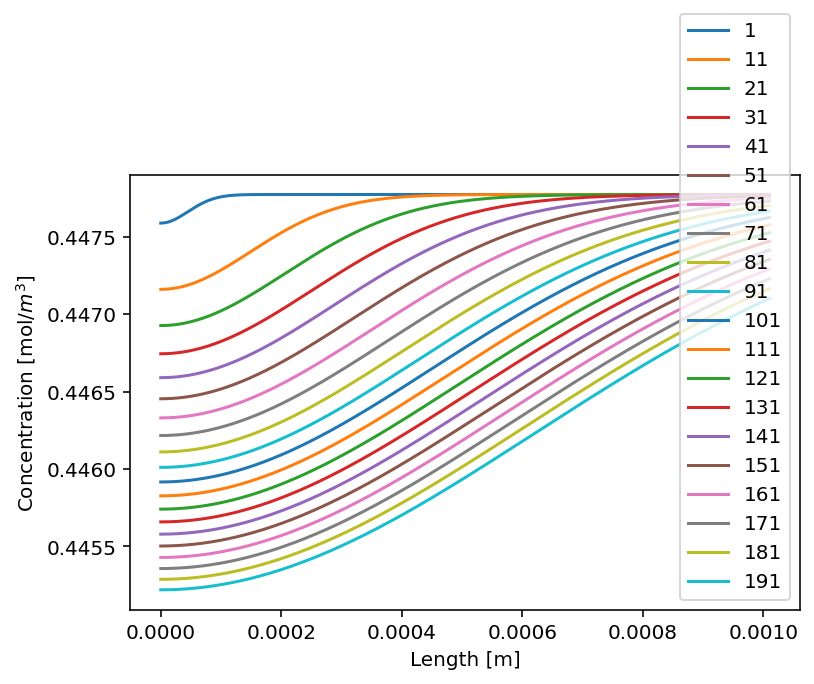

In [29]:
x = ((np.arange(10100)))/10E6
for i in range(1,200,10):
    t=i
    C_p =C_s_max_p*10E-6 - (I/(z*F*S*10E4*D_p*10E4)*(2*((D_p*10E4*t/np.pi)**0.5 * np.exp(-x**2/(4*D_p*10E4*t)-x*special.erfc(x/(2*(D_p*10E4*t)**0.5))))))
    plt.plot(x,C_p, label=i)
plt.xlabel('Length [m]')
plt.ylabel('Concentration [mol/$m^3$]')
plt.legend(loc='lower right')
plt.show()


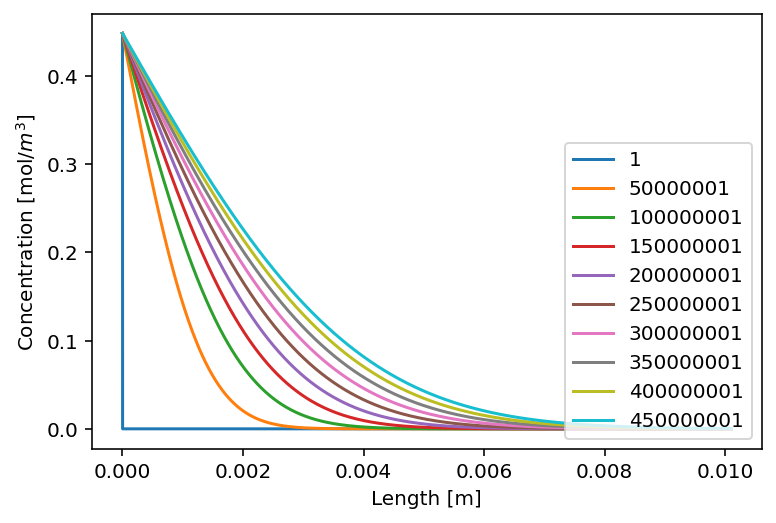

In [20]:
x = ((np.arange(10100)))/10E5
for i in range(1,500000000,50000000):
    t=i
    C_p =C_s_max_p*10E-6* special.erfc(x/(2*(D_p*t)**0.5))
    plt.plot(x,C_p, label=i)
plt.xlabel('Length [m]')
plt.ylabel('Concentration [mol/$m^3$]')
plt.legend(loc='lower right')
plt.show()

